In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
data = pd.read_csv('rev.csv')
data = data.head(4000)

In [71]:
# Преобразование текстовых отзывов в последовательности чисел
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [72]:
# Кодирование категориальных меток в бинарный формат
Y = pd.get_dummies(data['label']).values

In [73]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
# Создание модели
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# Обучение модели
batch_size = 32
history = model.fit(X_train, Y_train, epochs=7, batch_size=batch_size, validation_split=0.2)

Epoch 1/7
80/80 [==============================] - 19s 199ms/step - loss: 0.8475 - accuracy: 0.5355 - val_loss: 0.7900 - val_accuracy: 0.5578
Epoch 2/7
80/80 [==============================] - 15s 189ms/step - loss: 0.7364 - accuracy: 0.6410 - val_loss: 0.6747 - val_accuracy: 0.6891
Epoch 3/7
80/80 [==============================] - 14s 174ms/step - loss: 0.4789 - accuracy: 0.8156 - val_loss: 0.5563 - val_accuracy: 0.7844
Epoch 4/7
80/80 [==============================] - 14s 174ms/step - loss: 0.2664 - accuracy: 0.9004 - val_loss: 0.4799 - val_accuracy: 0.8141
Epoch 5/7
80/80 [==============================] - 14s 174ms/step - loss: 0.1382 - accuracy: 0.9547 - val_loss: 0.4202 - val_accuracy: 0.8531
Epoch 6/7
80/80 [==============================] - 14s 173ms/step - loss: 0.0771 - accuracy: 0.9750 - val_loss: 0.4136 - val_accuracy: 0.8813
Epoch 7/7
80/80 [==============================] - 14s 173ms/step - loss: 0.0510 - accuracy: 0.9883 - val_loss: 0.4116 - val_accuracy: 0.8766


In [76]:
# Оценка модели
accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8525000214576721


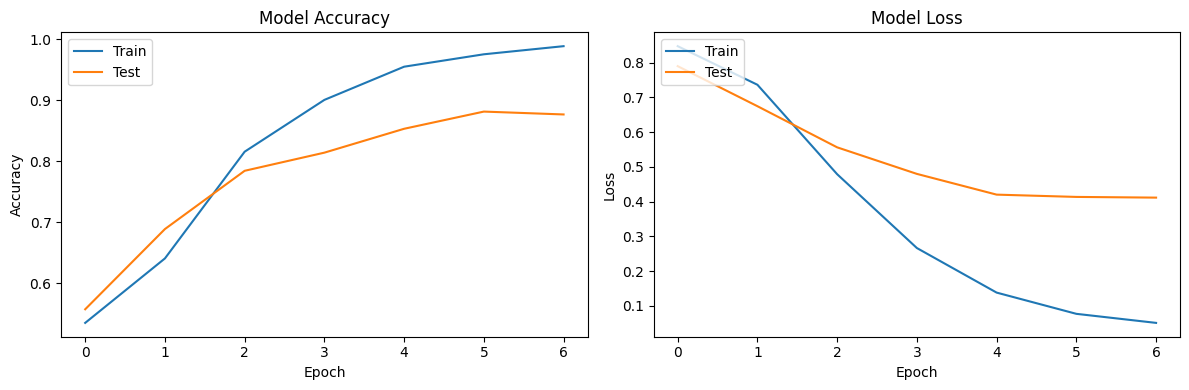

In [77]:
# Графики accuracy и loss на разных эпохах
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [78]:
# Оценка модели на тестовой выборке
Y_pred = model.predict(X_test)
Y_pred_classes = Y_pred.argmax(axis=-1)
Y_test_classes = Y_test.argmax(axis=-1)

print(classification_report(Y_test_classes, Y_pred_classes, zero_division=0))
#print(confusion_matrix(Y_test_classes, Y_pred_classes))

25/25 [==============================] - 2s 44ms/step
              precision    recall  f1-score   support

           0       0.60      0.24      0.35        37
           1       0.85      0.85      0.85       337
           2       0.86      0.90      0.88       426

    accuracy                           0.85       800
   macro avg       0.77      0.67      0.69       800
weighted avg       0.85      0.85      0.85       800



In [79]:
# Пример использования модели для анализа тональности
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = pad_sequences(sequence, maxlen=X.shape[1])
    prediction = model.predict(sequence)[0]
    class_names = ['нейтральный', 'позитивный', 'негативный']
    return class_names[prediction.argmax()]

In [80]:
# Пример использования
example_text = "This film is great!"
print(f"Sentiment: {predict_sentiment(example_text)}")

1/1 [==============================] - 0s 464ms/step
Sentiment: позитивный
